# Hoja de Trabajo No. 1 - Modelación y Simulación

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Definir el problema

In [2]:
def objetivo(x):
    return x * np.sin(10 * np.pi * x) + 1

### 2. Inicializar la población

In [3]:
def inicializar_poblacion(tam_poblacion):
    return np.random.uniform(0, 1, tam_poblacion)

### 3. Evaluar aptitud

In [4]:
def evaluar_aptitud(poblacion):
    return objetivo(poblacion)

### 4. Selección

In [5]:
def seleccion(poblacion, aptitudes, num_padres):
    indices = np.argsort(aptitudes)[-num_padres:]
    return poblacion[indices]

### 5. Crossover

In [6]:
def crossover(padres, tam_descendencia):
    descendencia = np.zeros(tam_descendencia)
    for i in range(tam_descendencia):
        p1, p2 = np.random.choice(padres, 2, replace=False)
        alpha = np.random.random()
        descendencia[i] = alpha * p1 + (1 - alpha) * p2
    return descendencia

### 6. Mutación

In [7]:
def mutar(descendencia, tasa_mutacion):
    for i in range(len(descendencia)):
        if np.random.random() < tasa_mutacion:
            descendencia[i] = np.random.uniform(0, 1)
    return descendencia

### 7 y 8. Reemplazo e iteración a través de generaciones

In [8]:
def algoritmo_genetico(tam_poblacion, num_generaciones, tasa_mutacion):
    poblacion = inicializar_poblacion(tam_poblacion)
    mejor_aptitud = []
    mejor_individuo = None

    for _ in range(num_generaciones):
        aptitudes = evaluar_aptitud(poblacion)
        mejor_aptitud.append(np.max(aptitudes))
        if mejor_individuo is None or aptitudes.max() > objetivo(mejor_individuo):
            mejor_individuo = poblacion[aptitudes.argmax()]

        padres = seleccion(poblacion, aptitudes, tam_poblacion // 2)
        descendencia = crossover(padres, tam_poblacion - len(padres))
        descendencia = mutar(descendencia, tasa_mutacion)
        poblacion = np.concatenate([padres, descendencia])

    return mejor_individuo, mejor_aptitud

### 9 y 10. Seguimiento y visualización

Mejor solución encontrada: x = 0.8511897936900367
Valor máximo de la función: f(x) = 1.8505952429626031


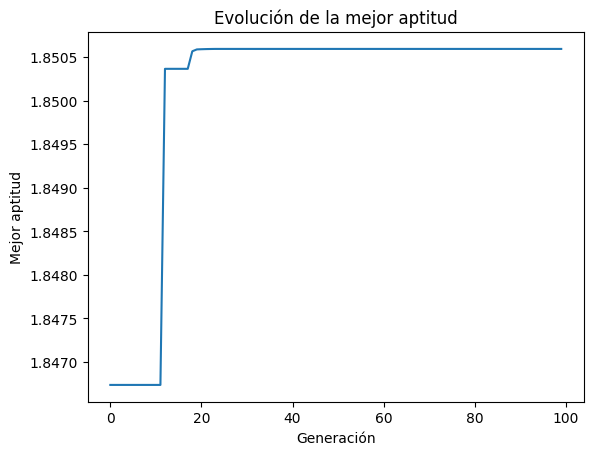

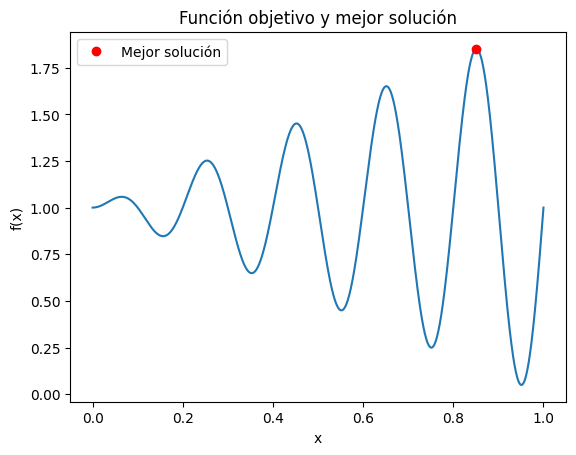

In [24]:
tam_poblacion = 100
num_generaciones = 100
tasa_mutacion = 0.1

mejor_solucion, historial_aptitud = algoritmo_genetico(tam_poblacion, num_generaciones, tasa_mutacion)

print(f"Mejor solución encontrada: x = {mejor_solucion}")
print(f"Valor máximo de la función: f(x) = {objetivo(mejor_solucion)}")

plt.plot(range(num_generaciones), historial_aptitud)
plt.xlabel('Generación')
plt.ylabel('Mejor aptitud')
plt.title('Evolución de la mejor aptitud')
plt.show()

x = np.linspace(0, 1, 1000)
y = objetivo(x)
plt.plot(x, y)
plt.plot(mejor_solucion, objetivo(mejor_solucion), 'ro', label='Mejor solución')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y mejor solución')
plt.legend()
plt.show()